In [29]:
import tensorflow as tf
import tensorflow_datasets as tfds


In [30]:
bb_chars={} 
Walter=''
Skyler=''
Jesse=''
Hank=''
Marie=''
Heisenberg=''
with open("breaking_bad_transcripts/season_all/merged.csv", "r+") as fp:
    for cnt, line in enumerate(fp):
        if line.startswith('Walter:'):
            Walter=Walter+' '+(line[8:])
        elif line.startswith('Skyler:'):
            Skyler=Skyler+' '+(line[8:])
        elif line.startswith('Jesse:'):
            Jesse=Jesse+' '+(line[7:])
        elif line.startswith('Hank:'):
            Hank=Hank+' '+(line[6:])
        if line.startswith('Marie:'):
            Marie=Marie+' '+(line[7:])
        if line.startswith('Heisenberg:'):
            Heisenberg=Heisenberg+' '+(line[12:])

bb_chars['Walter']=Walter
bb_chars['Skyler']=Skyler
bb_chars['Jesse']=Jesse
bb_chars['Hank']=Hank
bb_chars['Marie']=Marie

In [31]:
import pandas as pd
df1 = pd.DataFrame([x for x in bb_chars['Walter'].split('\n')])

df2 = pd.DataFrame([x for x in bb_chars['Skyler'].split('\n')])

df3 = pd.DataFrame([x for x in bb_chars['Jesse'].split('\n')])
df4 = pd.DataFrame([x for x in bb_chars['Hank'].split('\n')])

df5 = pd.DataFrame([x for x in bb_chars['Marie'].split('\n')])

In [32]:
df1.head()

,0
0,How does it feel to be a smart ass?
1,"I was curious. Honestly, I never expected you..."
2,"""Cap'n Cook?"" That's not you? Like I said, no..."
3,Not really.
4,Short speech. You lost your partner today. Wh...


In [33]:
listOfScores1 = ['Walter'] *df1.shape[0]
listOfScores2 = ['Skyler'] *df2.shape[0]
listOfScores3 = ['Jesse'] *df3.shape[0]
listOfScores4 = ['Hank'] *df4.shape[0]
listOfScores5 = ['Marie'] *df5.shape[0]

In [34]:
df1['Character'] = listOfScores1
df2['Character'] = listOfScores2 
df3['Character'] = listOfScores3
df4['Character'] = listOfScores4
df5['Character'] = listOfScores5


In [35]:
df1=df1.rename(columns={0: 'dialogue'})
df2=df2.rename(columns={0: 'dialogue'})
df3=df3.rename(columns={0: 'dialogue'})
df4=df4.rename(columns={0: 'dialogue'})
df5=df5.rename(columns={0: 'dialogue'})


In [36]:
df = pd.concat([df1, df2,df3,df4,df5])
df.tail()

,dialogue,Character
38,It is. Flynn.,Marie
39,"Flynn, honey, your mother is telling you the ...",Marie
40,Your dad’s in custody. You won’t be able to t...,Marie
41,I’ve tried. He’s not answering. Probably beca...,Marie
42,,Marie


In [37]:
from io import StringIO
col = ['Character', 'dialogue']
df = df[col]
df = df[pd.notnull(df['dialogue'])]
df.columns = ['Character', 'dialogue']
df['category_id'] = df['Character'].factorize()[0]
category_id_df = df[['Character', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Character']].values)
df.tail()

,Character,dialogue,category_id
38,Marie,It is. Flynn.,4
39,Marie,"Flynn, honey, your mother is telling you the ...",4
40,Marie,Your dad’s in custody. You won’t be able to t...,4
41,Marie,I’ve tried. He’s not answering. Probably beca...,4
42,Marie,,4


In [38]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

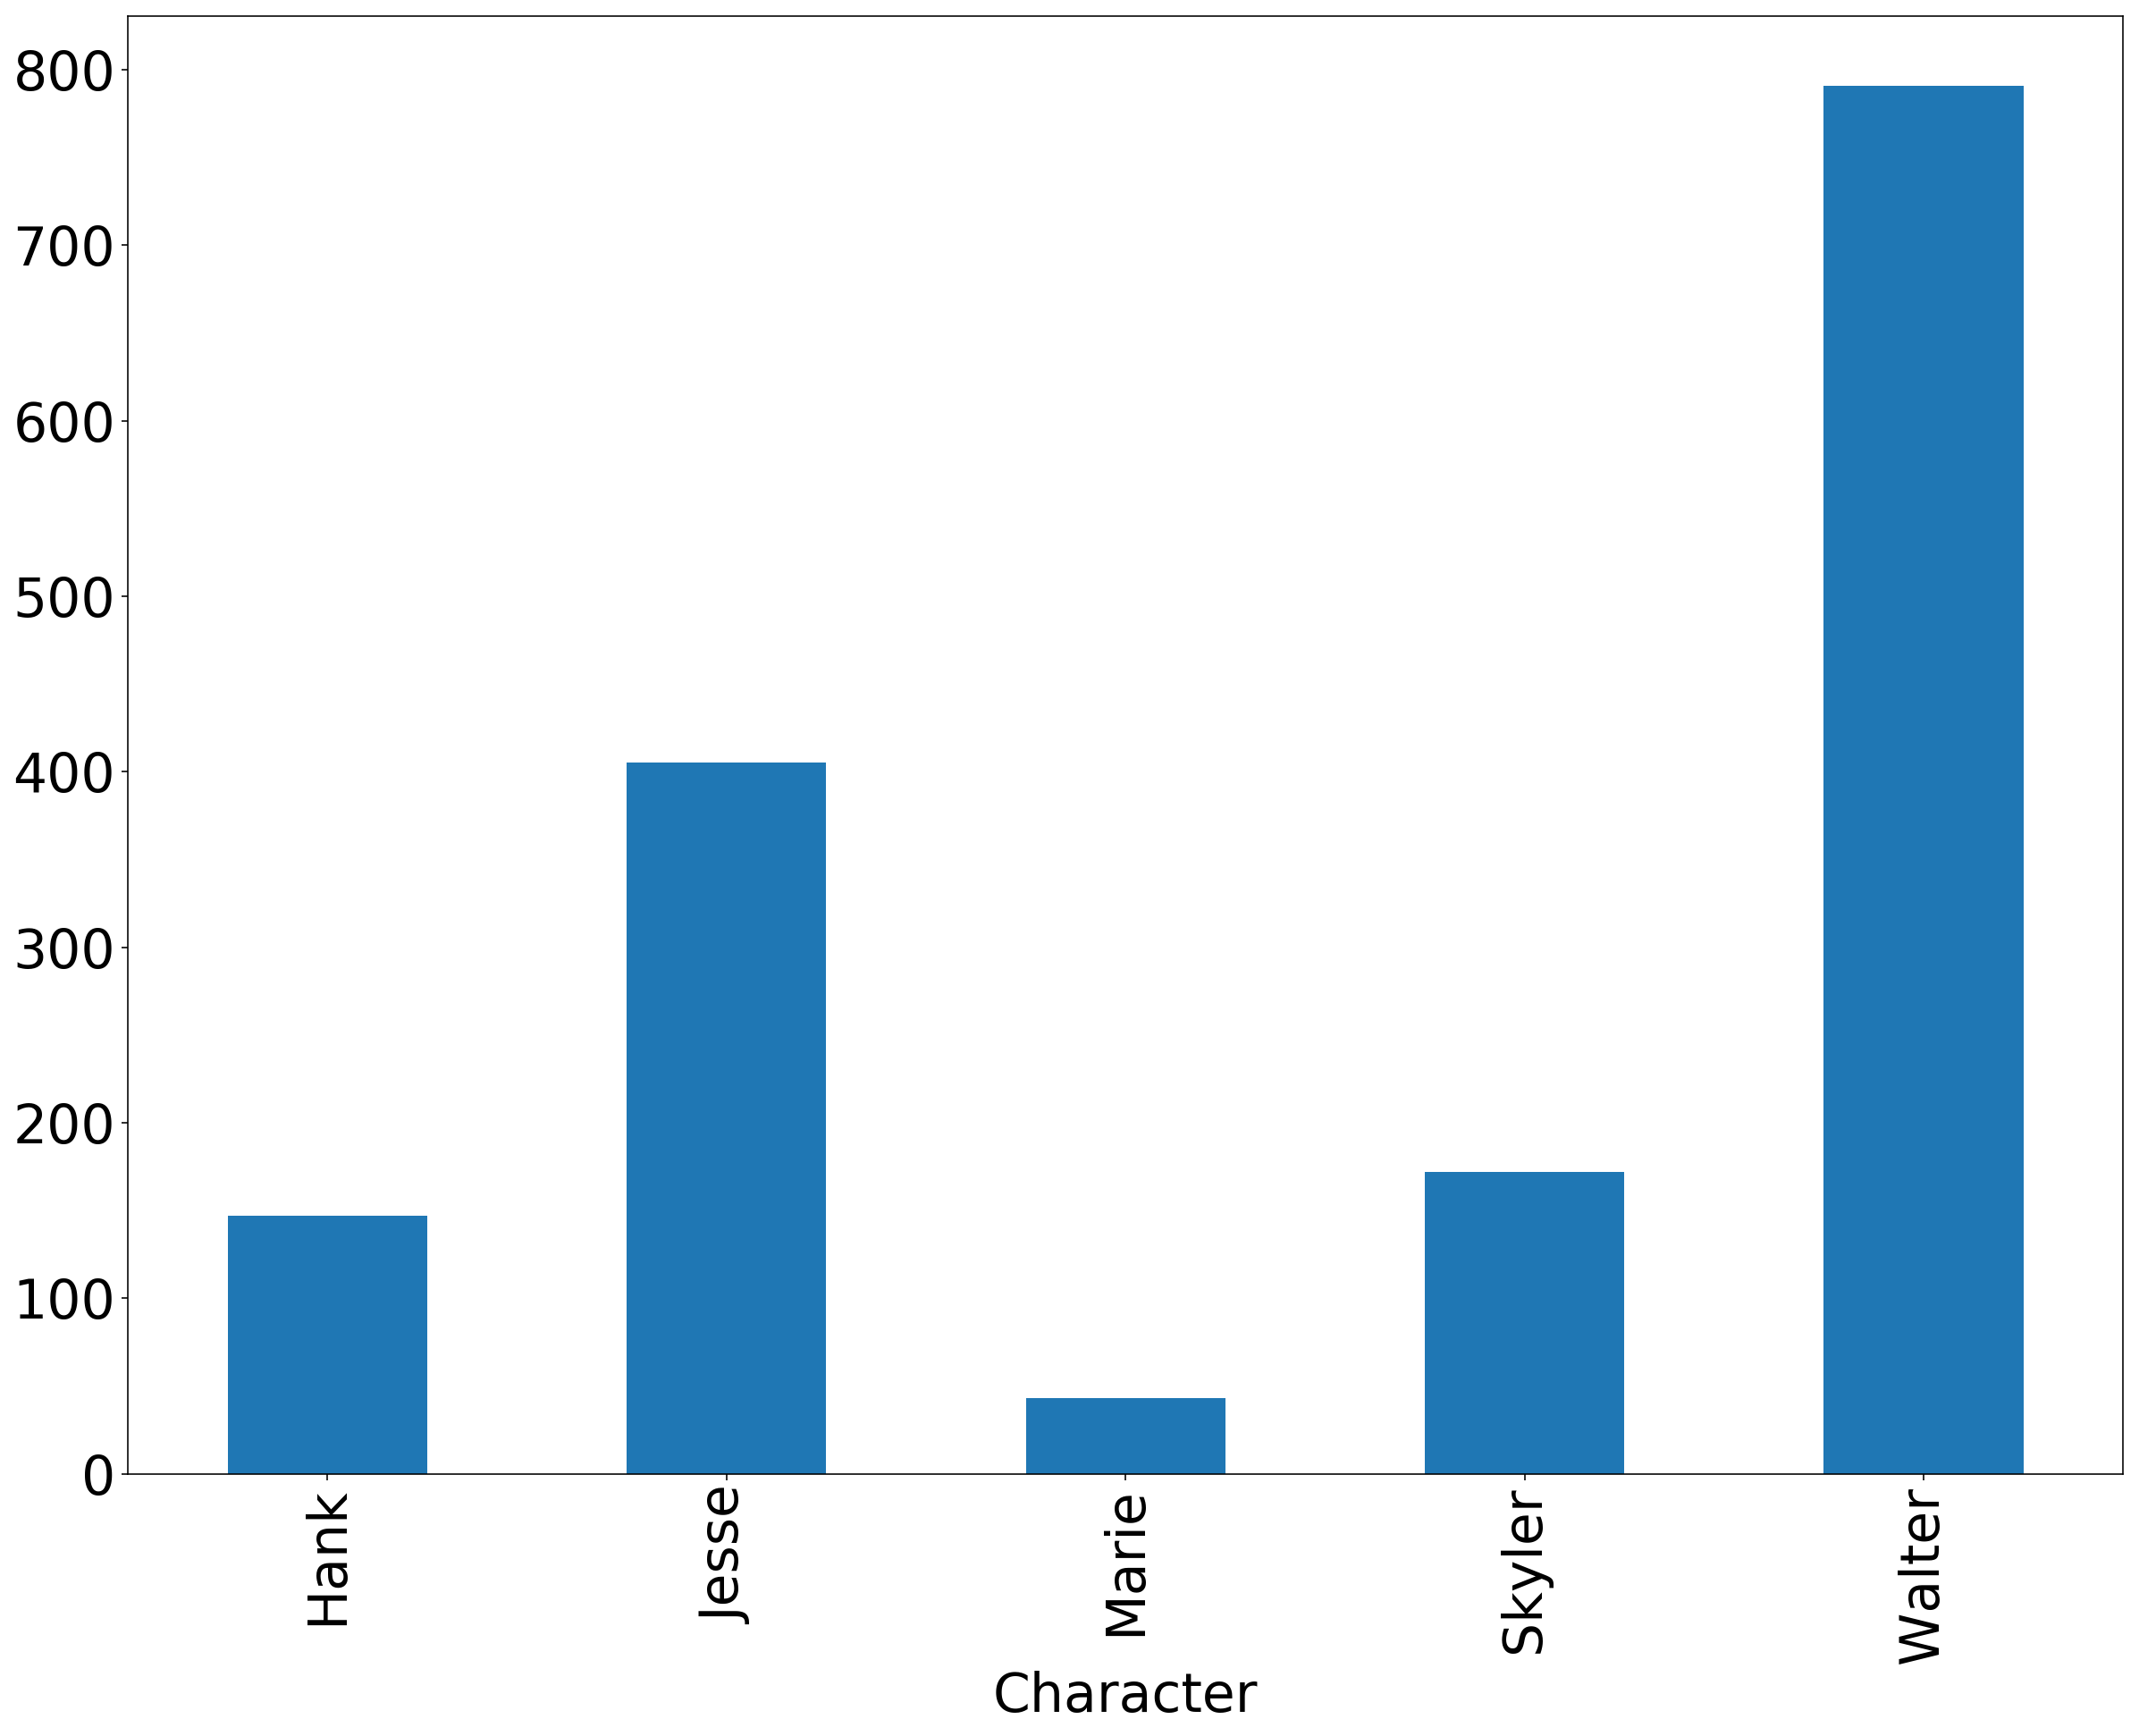

In [40]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,15))
df.groupby('Character').dialogue.count().plot.bar(ylim=0)
plt.rcParams["figure.figsize"] = (30,20)
plt.rcParams.update({'font.size': 30})
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['dialogue'], df['category_id'], test_size=0.33, random_state=42)
# count_vect = CountVectorizer()
# X_train_counts = count_vect.fit_transform(X_train)
# tfidf_transformer = TfidfTransformer()
# X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
# clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [14]:
vocab_size = 30000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
# sequences = tokenizer.texts_to_sequences(training_sentences)
# padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)





In [15]:
MAX_SEQUENCE_LENGTH = 120
X = tokenizer.texts_to_sequences(X_train.values)#df['Dialogue']#tokenizer.texts_to_sequences(df['Dialogue'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)
X

Shape of data tensor: (1043, 120)


array([[   0,    0,    0, ...,    0,    0,  854],
       [   0,    0,    0, ...,   50,  856,    2],
       [   0,    0,    0, ...,    2,   95,    9],
       ...,
       [   0,    0,    0, ..., 2805,   14,  119],
       [   0,    0,    0, ...,   34,   38,   75],
       [   0,    0,    0, ...,   14, 2810,  486]], dtype=int32)

In [16]:
x_test=tokenizer.texts_to_sequences(X_test.values)#df['Dialogue']#tokenizer.texts_to_sequences(df['Dialogue'].values)
x_test = pad_sequences(x_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', x_test.shape)
x_test

Shape of data tensor: (515, 120)


array([[   0,    0,    0, ...,    1,  163,    1],
       [   0,    0,    0, ...,   15,    1,    1],
       [   0,    0,    0, ...,   32,   22,   10],
       ...,
       [   0,    0,    0, ...,    3,  417,   14],
       [   0,    0,    0, ...,   27,  237,  833],
       [   0,    0,    0, ...,   19,  452, 2260]], dtype=int32)

In [17]:
Y = pd.get_dummies(y_train).values#df['category_id']
#print('Shape of label tensor:', Y.shape)
Y

array([[0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [18]:
y_test = pd.get_dummies(y_test).values#df['category_id']
#print('Shape of label tensor:', Y.shape)
y_test

array([[0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [19]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 20000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 120
# This is fixed.
EMBEDDING_DIM = 64


from tensorflow.keras.callbacks import EarlyStopping

model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model1.add(tf.keras.layers.SpatialDropout1D(0.2))
model1.add(tf.keras.layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model1.add(tf.keras.layers.Dense(5, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64

history = model1.fit(X, Y, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

W1104 07:17:52.764092 4591693248 deprecation.py:323] From /usr/local/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 938 samples, validate on 105 samples
Epoch 1/10
938/938 [==============================] - 2s 2ms/sample - loss: 1.5196 - accuracy: 0.4627 - val_loss: 1.3599 - val_accuracy: 0.4762
Epoch 2/10
938/938 [==============================] - 1s 1ms/sample - loss: 1.2907 - accuracy: 0.5043 - val_loss: 1.3349 - val_accuracy: 0.4762
Epoch 3/10
938/938 [==============================] - 1s 1ms/sample - loss: 1.2643 - accuracy: 0.5043 - val_loss: 1.3253 - val_accuracy: 0.4762
Epoch 4/10
938/938 [==============================] - 1s 1ms/sample - loss: 1.2453 - accuracy: 0.5043 - val_loss: 1.3234 - val_accuracy: 0.4762
Epoch 5/10
938/938 [==============================] - 1s 1ms/sample - loss: 1.2097 - accuracy: 0.5043 - val_loss: 1.3258 - val_accuracy: 0.4762
Epoch 6/10
938/938 [==============================] - 1s 1ms/sample - loss: 1.1617 - accuracy: 0.5117 - val_loss: 1.3142 - val_accuracy: 0.4762
Epoch 7/10
938/938 [==============================] - 1s 1ms/sample - loss: 1.0937 - accur

In [ ]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(24, activation='relu'),
#     tf.keras.layers.Dense(6, activation='sigmoid')
# ])
# model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# model.summary()


In [ ]:
# num_epochs = 10
# model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

In [24]:
y_pred = model1.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)
y_pred


array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]])

In [25]:
y_test

array([[0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

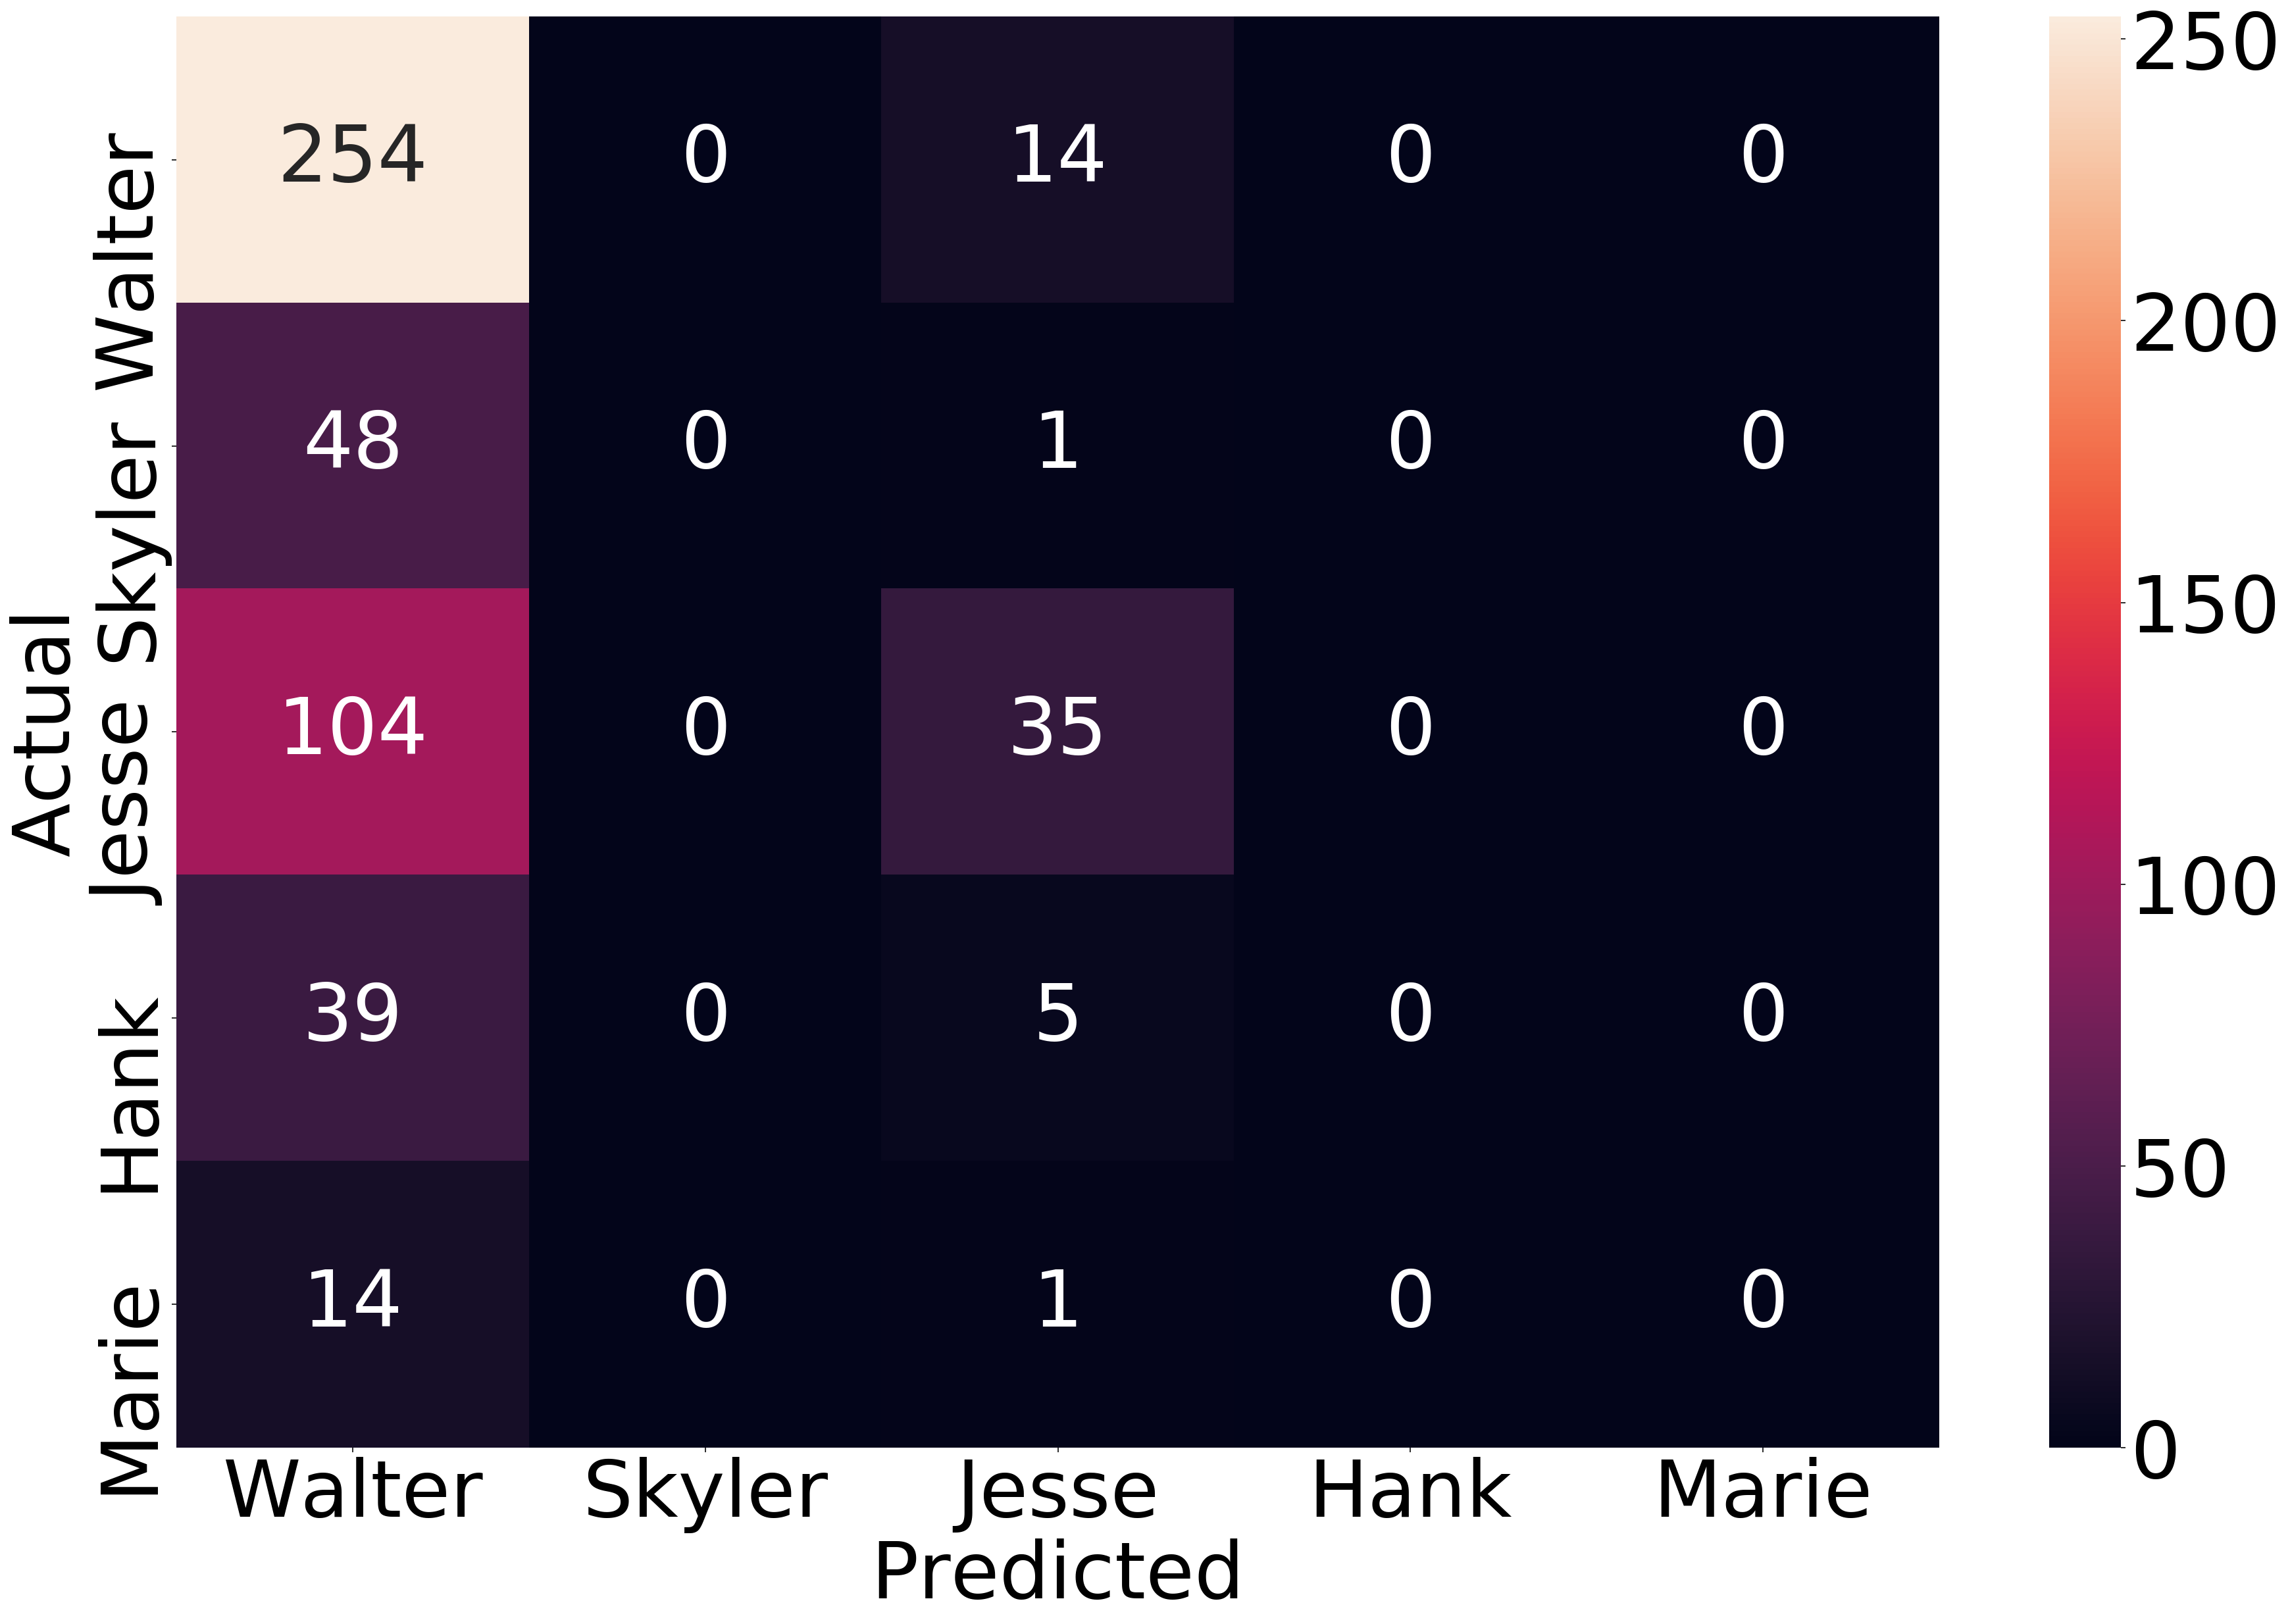

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#conf_mat = confusion_matrix(y_test, y_pred)
conf_mat = confusion_matrix(
    y_test.argmax(axis=1), y_pred.argmax(axis=1))
fig, ax = plt.subplots(figsize=(30,20))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Score.values, yticklabels=category_id_df.Score.values)
plt.rcParams.update({'font.size': 40})
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

####stuck here#####




In [23]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['Score'].unique()))

              precision    recall  f1-score   support

      Walter       0.63      0.44      0.52       268
      Skyler       0.00      0.00      0.00        49
       Jesse       0.62      0.25      0.36       139
        Hank       0.00      0.00      0.00        44
       Marie       0.00      0.00      0.00        15

   micro avg       0.63      0.30      0.41       515
   macro avg       0.25      0.14      0.18       515
weighted avg       0.50      0.30      0.37       515
 samples avg       0.30      0.30      0.30       515



/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
